In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
dataset = pd.read_csv('insurance.csv')

# Explore the data

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
dataset.shape

(1338, 7)

In [7]:


# checking for null values 
dataset.isnull().sum() # no missing data in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
dataset.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [9]:
print('different regions: ', dataset['region'].unique())
print('smoker: ', dataset['smoker'].unique())
print('Sex: ', dataset['sex'].unique())
print('Number of children: ', dataset['children'].unique())

different regions:  ['southwest' 'southeast' 'northwest' 'northeast']
smoker:  ['yes' 'no']
Sex:  ['female' 'male']
Number of children:  [0 1 3 2 5 4]


In [10]:
# checking for duplicate rows.
print(format(dataset.duplicated().sum()))

1


In [11]:
# removing the duplicated row.
dataset.drop_duplicates(inplace=True)

In [12]:
dataset.shape

(1337, 7)

# Data Visualization

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

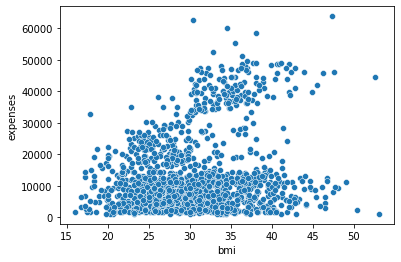

In [13]:
sns.scatterplot(x = dataset['bmi'], y = dataset['expenses'])

From this graph we can see that there is some correlation between the bmi and medical expenses. People with high bmi tend to spend more on medical expenses.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

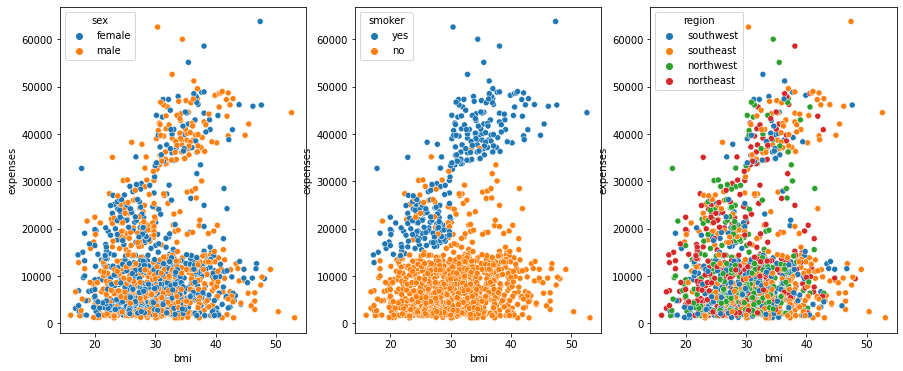

In [14]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=dataset,hue='sex')
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=dataset,hue='smoker')
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=dataset,hue='region')

Inferences-
1. People with high bmi,  who smoke tend to spend more on medical expenses.
2. Region dosen't seem to have a big infuence on the expenses.

Text(0, 0.5, 'expenses')

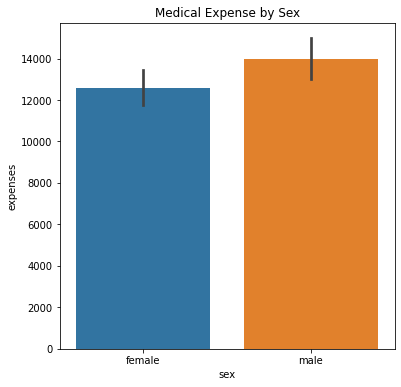

In [15]:
plt.figure(figsize=(6,6))
plt.title("Medical Expense by Sex")
sns.barplot(x=dataset['sex'], y=dataset['expenses'])
plt.ylabel("expenses")

Text(0, 0.5, 'expenses')

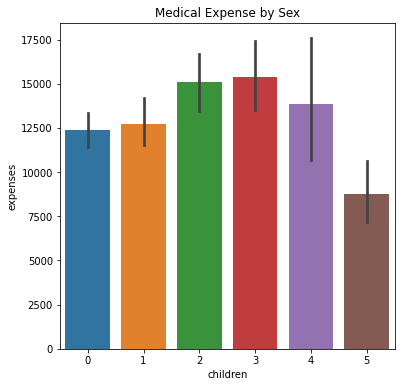

In [16]:
plt.figure(figsize=(6,6))
plt.title("Medical Expense by Sex")
sns.barplot(x=dataset['children'], y=dataset['expenses'])
plt.ylabel("expenses")

People with 2 to 3 children seem to spend more on medical expenses.

Text(0, 0.5, 'expenses')

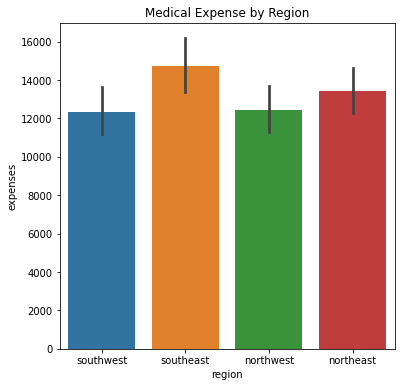

In [17]:
plt.figure(figsize=(6,6))
plt.title("Medical Expense by Region")
sns.barplot(x=dataset['region'], y=dataset['expenses'])
plt.ylabel("expenses")

<AxesSubplot:xlabel='expenses', ylabel='Density'>

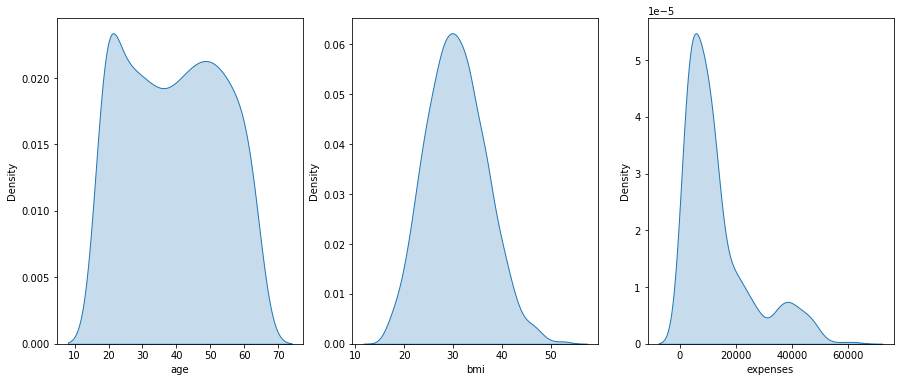

In [18]:
# Distribution plots
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.kdeplot(data = dataset['age'],ax=axes[0], shade=True)
sns.kdeplot(data = dataset['bmi'],ax=axes[1], shade=True)
sns.kdeplot(data = dataset['expenses'], ax=axes[2], shade=True)

lets explore the correlations within the dataset

In [19]:
dataset.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


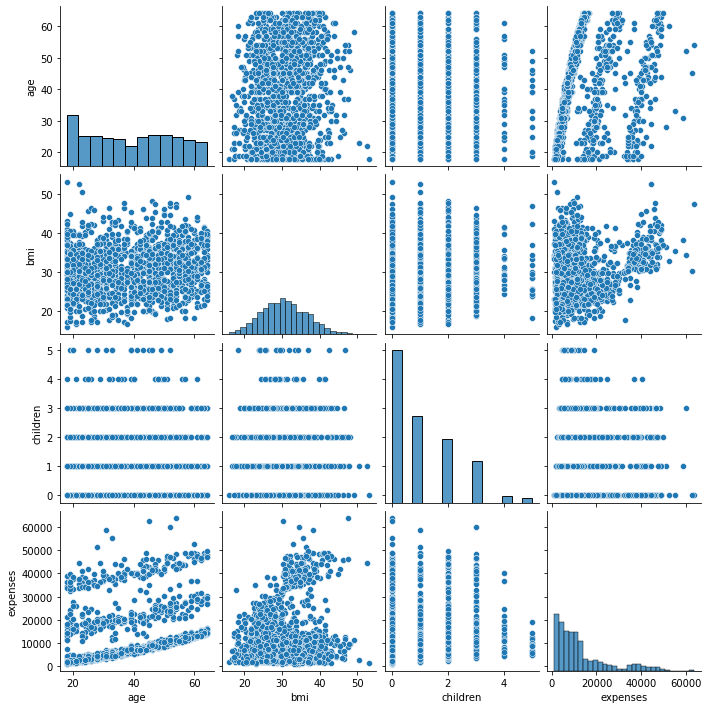

In [20]:
sns.pairplot(dataset)

<AxesSubplot:>

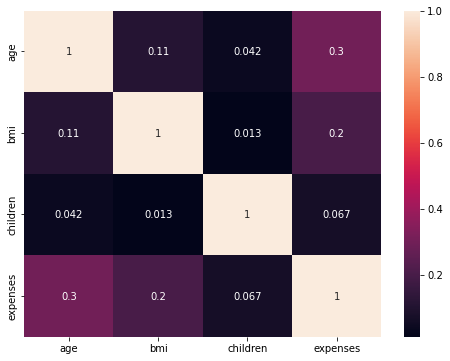

In [21]:
corr = dataset.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

age, bmi seem to have a positive correlation with expense

# Pre-Processing of the dataset

In [22]:
DS = pd.get_dummies(dataset, drop_first=True)

In [23]:
DS.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [24]:
DS.corr()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109414,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109414,1.000000,0.012641,0.198637,0.046405,0.003964,-0.136137,0.270177,-0.006403
children,0.041536,0.012641,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
expenses,0.298308,0.198637,0.067389,1.000000,0.058045,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046405,0.017848,0.058045,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003964,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136137,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270177,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006403,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


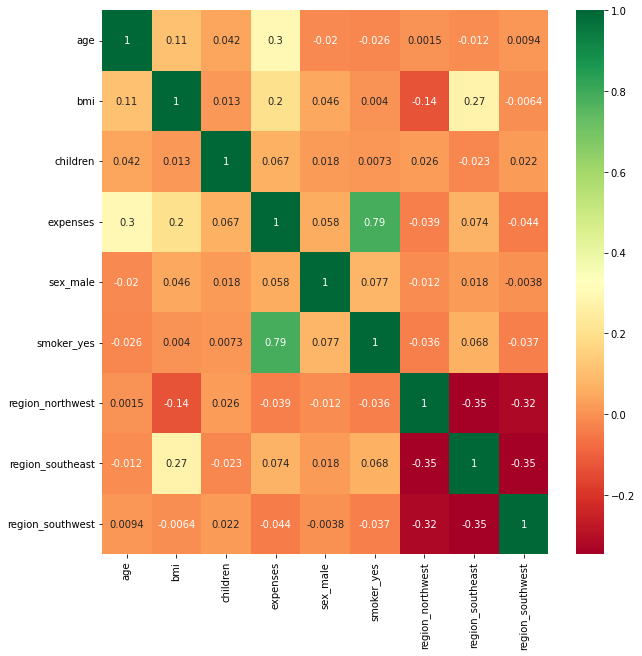

In [25]:
corrmat  = DS.corr()
top_corr_features = corrmat.index 
plt.figure(figsize=(10, 10))
#plot heatmap
h = sns.heatmap(DS[top_corr_features].corr(), annot=True, cmap='RdYlGn')

Inference-
1. most important features- age, bmi, smoker.
2. least important feature- region, number of children, sex.

In [26]:
y = DS['expenses']
features = DS.drop(['expenses'], axis=1)

In [27]:
features.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [28]:
def evaluation(y_train, y_preds_train, y_test, y_preds_test):
    accuracy_model_train = r2_score(y_train, y_preds_train)
    print("Training Accuracy: ", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_preds_test)
    print("Testing Accuracy: ", accuracy_model_test)
    mae_train = mean_absolute_error(y_train, y_preds_train)
    print("MAE  for training Data: ", mae_train)
    mae_test = mean_absolute_error(y_test, y_preds_test)
    print("MAE for test Data: ", mae_test)
    RMSE_model_train = mean_squared_error(y_train, y_preds_train, squared=False)
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = mean_squared_error(y_test, y_preds_test, squared=False)
    print("RMSE for Testing Data: ", RMSE_model_test)
    
def plot(y_test, y_preds_test):
    fig, axes = plt.subplots(ncols = 2, figsize = (15,6), squeeze=True)
    sns.scatterplot(y_test, y_preds_test, ax=axes[0])
    sns.kdeplot(y_test, ax=axes[1], label='test set')
    sns.kdeplot(y_preds_test, ax=axes[1], label='predicted values')
    plt.legend()
    

In [29]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, y, test_size=0.2, random_state=0)

# Model Selection

### Model 1 (RandomForestRegressor)

In [30]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train1, y_train1)

RandomForestRegressor()

In [31]:
y_preds_train = RF_model.predict(X_train1)
y_preds_test = RF_model.predict(X_test1)

Training Accuracy:  0.9760203077660069
Testing Accuracy:  0.8384883236142657
MAE  for training Data:  982.4095191371551
MAE for test Data:  2928.664639365671
RMSE for Training Data:  1838.30004686419
RMSE for Testing Data:  5212.584709194831
cross validation on training data:  [0.86602663 0.75139905 0.8316253  0.83197843 0.85859043]


C:\Users\sujan\Anaconda3\envs\insurance\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


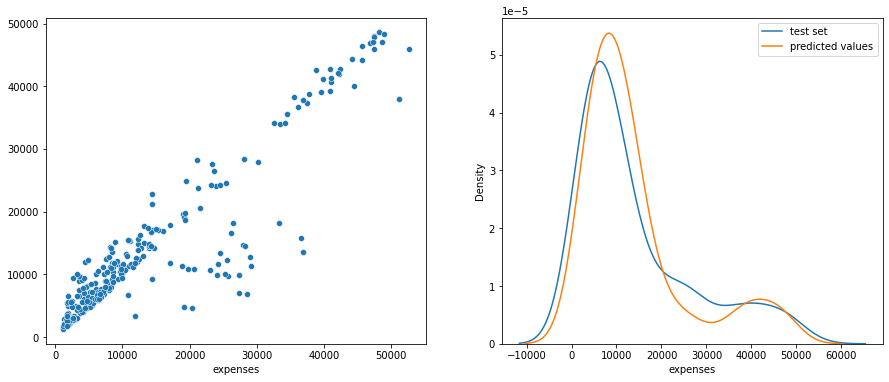

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
evaluation(y_train1, y_preds_train, y_test1, y_preds_test)
print("cross validation on training data: ", cross_val_score(RF_model, X_train1, y_train1, scoring='r2', cv = 5))
plot(y_test1, y_preds_test)

Model seems to overfit on the train data.

In [33]:
#Scaling numeric features using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler
numeric=['age', 'bmi', 'children']
sc=StandardScaler()
X_train1[numeric]=sc.fit_transform(X_train1[numeric])
X_test1[numeric]=sc.transform(X_test1[numeric])

In [34]:
X_train1.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
896,0.262271,-1.775427,0.766846,0,1,0,0,0
194,-1.510415,0.598121,-0.897638,1,0,0,1,0
240,-1.155878,0.977229,0.766846,0,1,0,0,0
1257,1.042253,-0.522721,-0.065396,0,0,1,0,0
575,1.325883,-0.588653,-0.897638,0,0,1,0,0


In [35]:
RF_model.fit(X_train1, y_train1)

RandomForestRegressor()

Training Accuracy:  0.9758021909017716
Testing Accuracy:  0.8402355471054431
MAE  for training Data:  992.9808043498599
MAE for test Data:  2952.378433084576
RMSE for Training Data:  1846.6416172766362
RMSE for Testing Data:  5184.313329604878


C:\Users\sujan\Anaconda3\envs\insurance\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


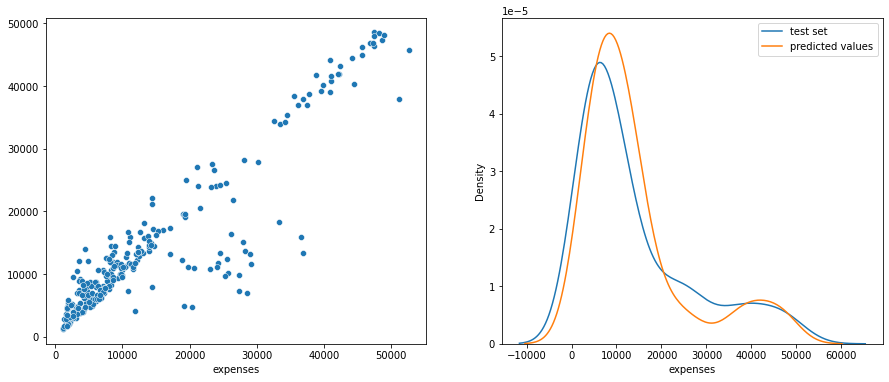

In [36]:
y_preds_train = RF_model.predict(X_train1)
y_preds_test = RF_model.predict(X_test1)
evaluation(y_train1, y_preds_train, y_test1, y_preds_test)
plot(y_test1, y_preds_test)

Scaling the numeric data only gave minor improvements, there is still overfitting in train data. From our EDA we saw that the distribution for expenses is highly skewed, therefore we will try to normalize this behaviour with target transformer & QuantileTransformer.

In [37]:
# handling skewness in the target data.
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

In [38]:
Y = DS['expenses']
X = DS.drop(['expenses'], axis=1)

In [39]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [41]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
896,43,20.0,2,0,1,0,0,0
194,18,34.4,0,1,0,0,1,0
240,23,36.7,2,0,1,0,0,0
1257,54,27.6,1,0,0,1,0,0
575,58,27.2,0,0,0,1,0,0


In [42]:
regr_trans = TransformedTargetRegressor(regressor=RF_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
y_preds_train = regr_trans.predict(X_train)
y_preds_test = regr_trans.predict(X_test)

Training Accuracy:  0.9550478169583435
Testing Accuracy:  0.8424859471122149
MAE  for training Data:  967.4287840735384
MAE for test Data:  2521.51996265963
RMSE for Training Data:  2516.9233486916623
RMSE for Testing Data:  5147.6714037773


C:\Users\sujan\Anaconda3\envs\insurance\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


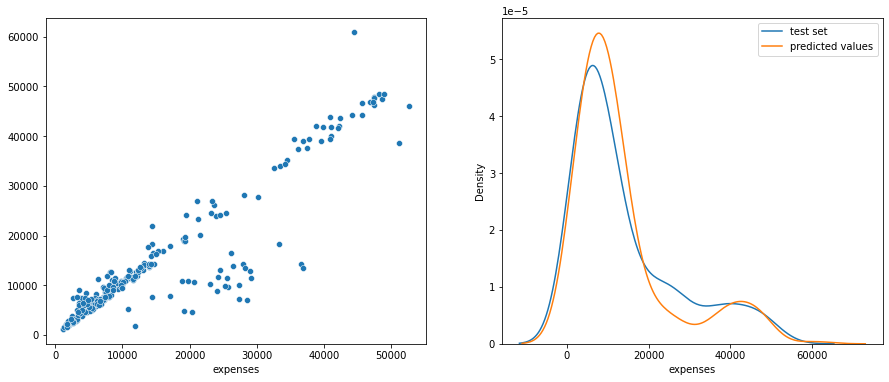

In [43]:
evaluation(y_train, y_preds_train, y_test, y_preds_test)
plot(y_test, y_preds_test)

Not much improvement, overfitting in train data.

### Model 2 (GradientBoostingRegressor)

In [44]:
# model 2 -- Gradient Boosting Regressor.
from sklearn.ensemble import GradientBoostingRegressor
GR_model = GradientBoostingRegressor()

In [45]:
GR_model.fit(X_train, y_train)
y_preds_train = GR_model.predict(X_train)
y_preds_test = GR_model.predict(X_test)

Training Accuracy:  0.9043833202533631
Testing Accuracy:  0.8487619862350604
MAE  for training Data:  1946.775723434005
MAE for test Data:  2770.854137662239
RMSE for Training Data:  3670.8059357102607
RMSE for Testing Data:  5044.076281981527


C:\Users\sujan\Anaconda3\envs\insurance\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


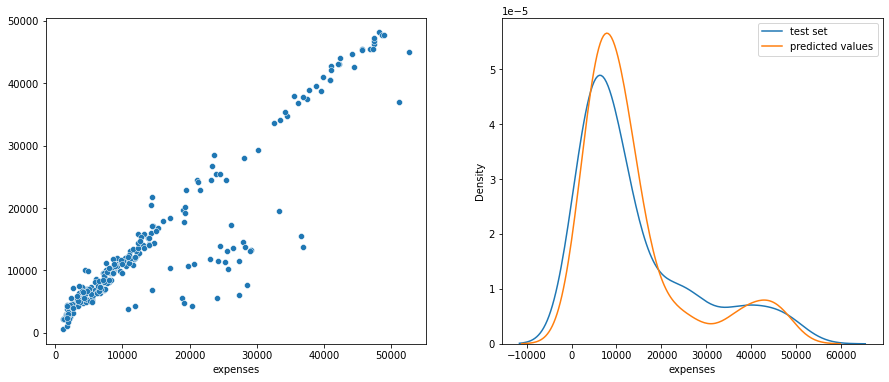

In [46]:
evaluation(y_train, y_preds_train, y_test, y_preds_test)
plot(y_test, y_preds_test)

better performance that previous model.

### Model 3 (XGBRegressor)

In [47]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(learning_rate=0.1)

In [48]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Training Accuracy:  0.9662106423108446
Testing Accuracy:  0.8347535136118025
MAE  for training Data:  1150.1200581278501
MAE for test Data:  2930.240840718284
RMSE for Training Data:  2182.1498164430186
RMSE for Testing Data:  5272.508399168628


C:\Users\sujan\Anaconda3\envs\insurance\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


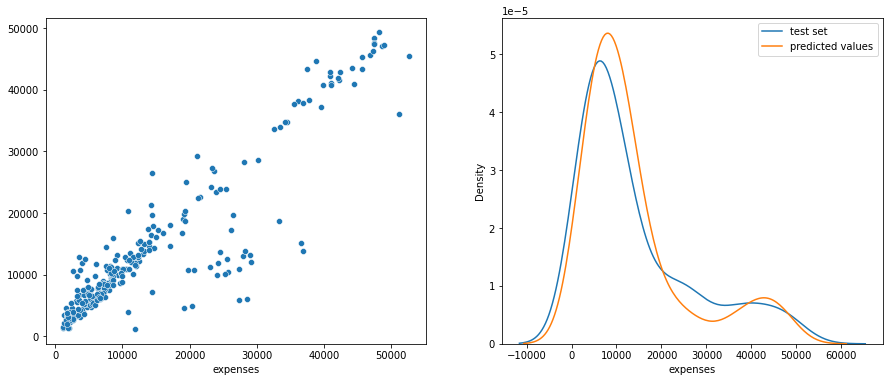

In [49]:
y_preds_train = xgb_model.predict(X_train)
y_preds_test = xgb_model.predict(X_test)
evaluation(y_train, y_preds_train, y_test, y_preds_test)
plot(y_test, y_preds_test)

Overfitting of training data.

We will be proceeding with GradientBoostingRegressor

### Hyper-Parameter Tuning

In [50]:
# GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,3, 5, 7]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#learning rate
learning_rate = [0.02,0.04,0.06,0.08,0.1]
#'max_features': max_features,
#'max_depth': max_depth,
#'min_samples_split': min_samples_split,
#'min_samples_leaf': min_samples_leaf

In [51]:
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
               'max_depth': max_depth,
              'max_features': max_features,
              'learning_rate': learning_rate}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_depth': [2, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1]}


In [52]:
from sklearn.model_selection import GridSearchCV
GR1 = GradientBoostingRegressor(random_state=0)

In [53]:
gsearch1 = GridSearchCV(estimator = GR1, param_grid = random_grid,n_jobs=-1, cv=10)

In [54]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1],
                         'max_depth': [2, 3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120]})

In [55]:
gsearch1.best_params_

{'learning_rate': 0.06,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 90}

Training Accuracy:  0.8866059304669136
Testing Accuracy:  0.851548442488818
MAE  for training Data:  2121.330190041686
MAE for test Data:  2790.6228570481103
RMSE for Training Data:  3997.51191326628
RMSE for Testing Data:  4997.393441584195


C:\Users\sujan\Anaconda3\envs\insurance\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


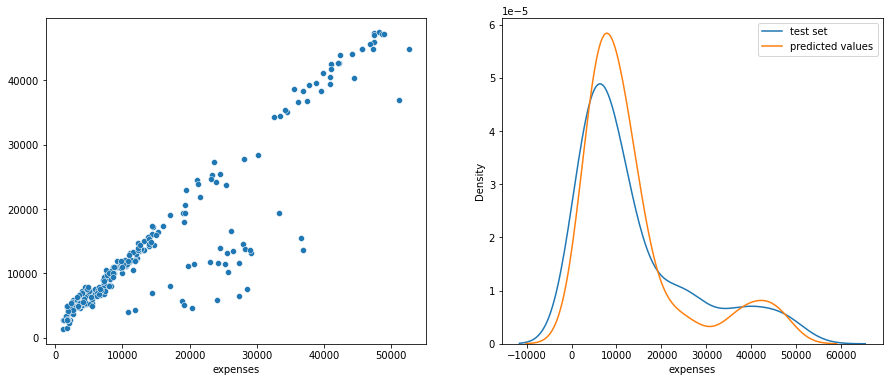

In [56]:
y_preds_train = gsearch1.predict(X_train)
y_preds_test = gsearch1.predict(X_test)
evaluation(y_train, y_preds_train, y_test, y_preds_test)
plot(y_test, y_preds_test)

1. All the models seem to produce similar accuracy on the test data.
2. Hyperparameter tuning of the GradientBoostingRegressor model seems to give the best accuracy of 0.85

In [57]:
import pickle
# open a file, where you ant to store the data
file = open('GradientBoostingRegressor.pkl', 'wb')

# dump information to that file
pickle.dump(gsearch1, file)